In [1]:
# Import libraries

In [54]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Read data

In [4]:
df = pd.read_csv('forestfires.csv')
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [5]:
# EDA

In [6]:
df.shape

(517, 31)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [8]:
df.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
df.describe(include = 'O')

,month,day,size_category
count,517,517,517
unique,12,7,2
top,aug,sun,small
freq,184,95,378


In [10]:
df.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [13]:
# Dropping columns which are not required

In [19]:
df = df.drop(['dayfri', 'daymon', 'daysat', 'daysun', 'daythu','daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 
                  'monthfeb','monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov','monthoct','monthsep'], 
                 axis = 1)
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,small
...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small


In [20]:
# Checking how many datapoints are having small and large area

In [21]:
df.size_category.value_counts()

small    371
large    138
Name: size_category, dtype: int64

<AxesSubplot:xlabel='size_category', ylabel='count'>

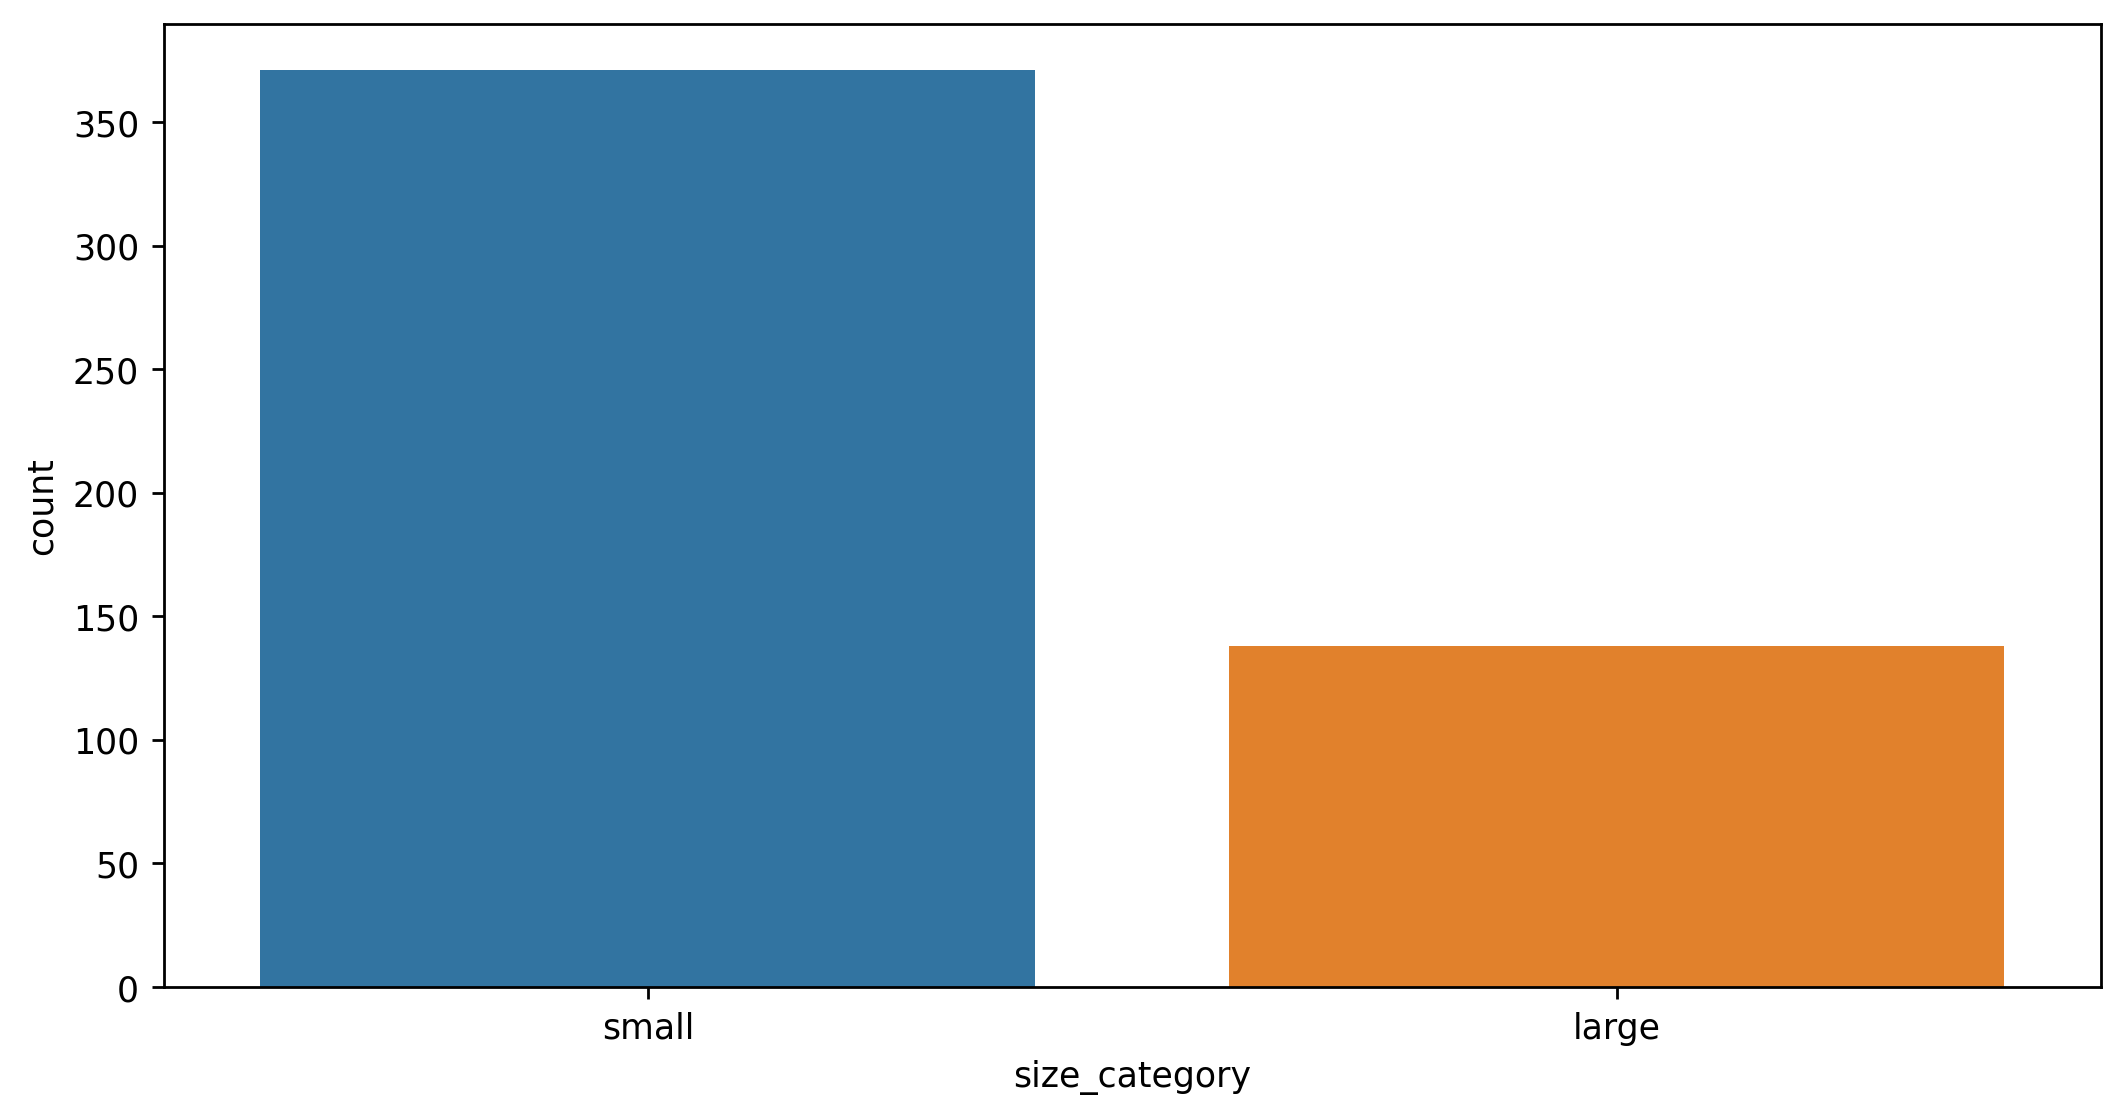

In [22]:
sns.countplot(x = 'size_category', data = df)

In [23]:
pd.crosstab(df.area, df.size_category)

size_category,large,small
area,,
0.00,0,240
0.09,0,1
0.17,0,1
0.21,0,1
0.24,0,1
...,...,...
200.94,1,0
212.88,1,0
278.53,1,0


In [24]:
# Plotting month vs temp plot

[Text(0.5, 1.0, 'Month Vs Temp Barplot'),
 Text(0.5, 0, 'Months'),
 Text(0, 0.5, 'Temperature')]

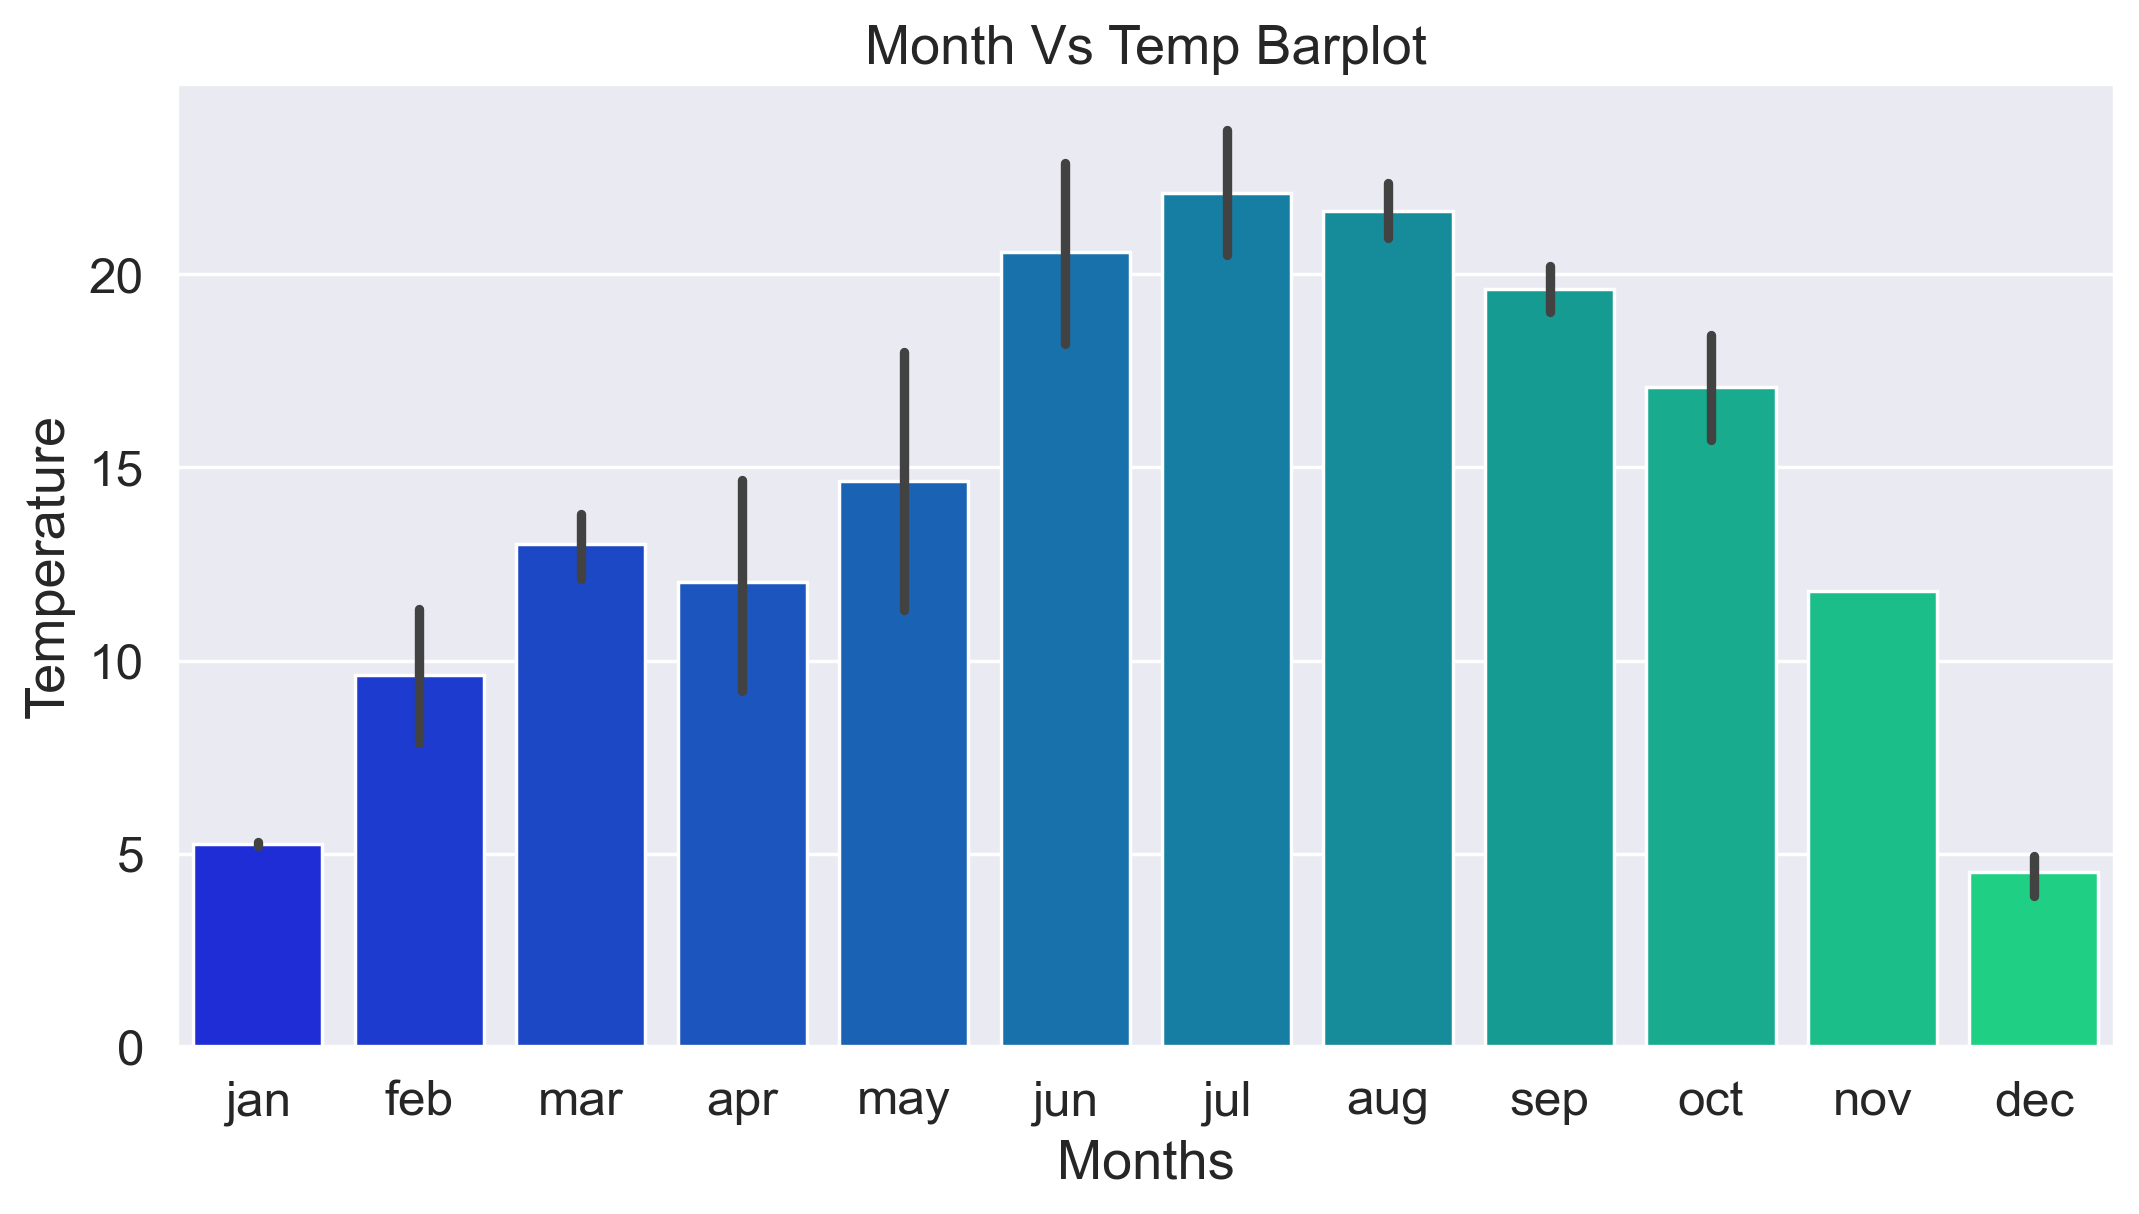

In [25]:
sns.set(style = "darkgrid", font_scale = 1.3)
month_temp = sns.barplot(x = 'month', y = 'temp', data = df,
                         order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], palette = 'winter')
month_temp.set(title = "Month Vs Temp Barplot", xlabel = "Months", ylabel = "Temperature")

[Text(0.5, 1.0, 'Countplot for the weekdays'),
 Text(0.5, 0, 'Days'),
 Text(0, 0.5, 'Count')]

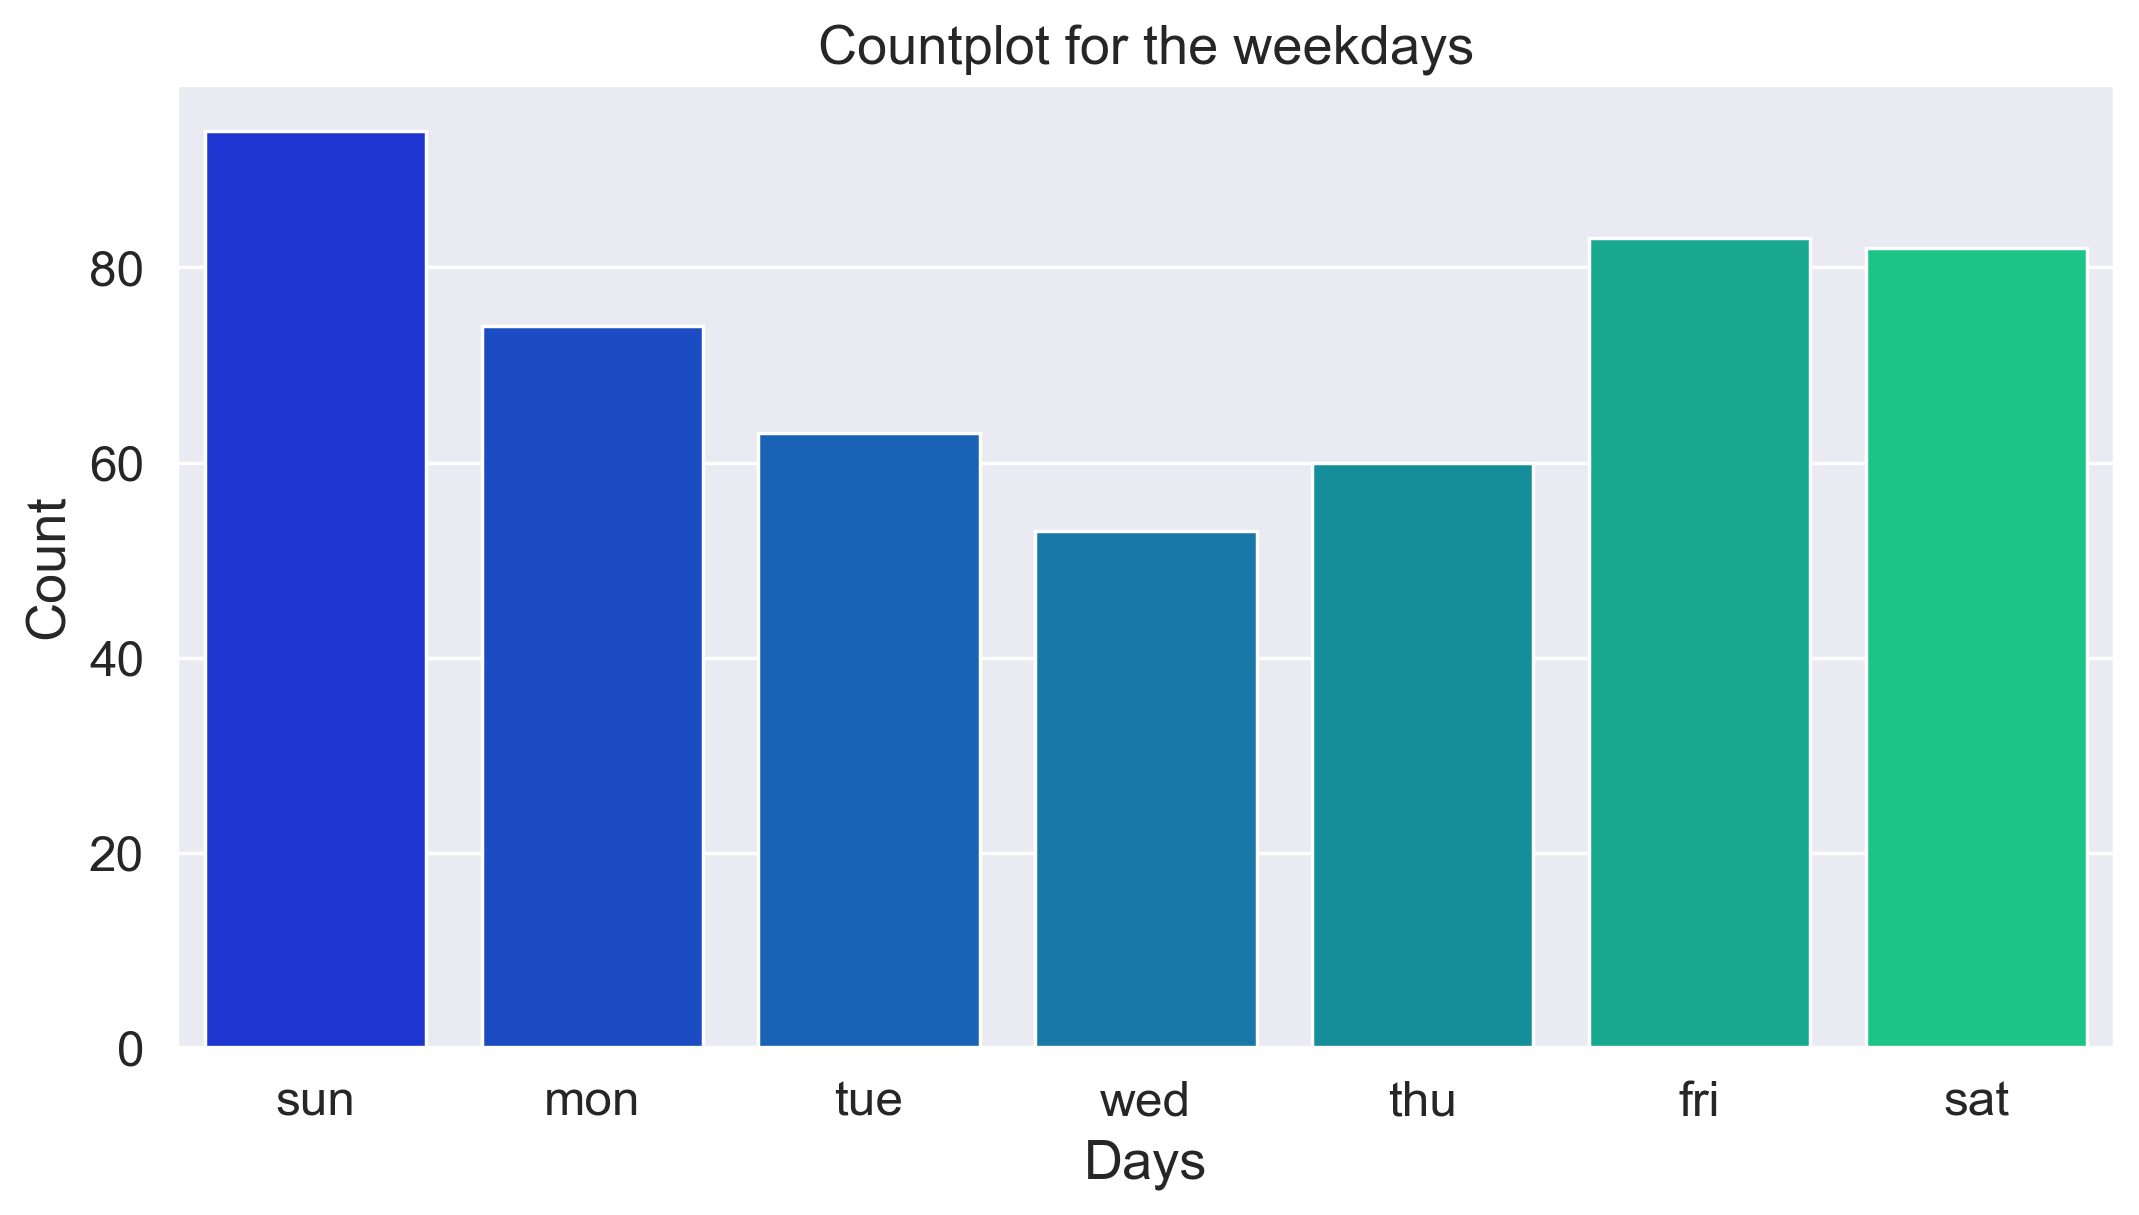

In [27]:
sns.set(style = 'darkgrid', font_scale = 1.3)
day = sns.countplot(df['day'], order = ['sun' ,'mon', 'tue', 'wed', 'thu', 'fri', 'sat'], palette = 'winter')
day.set(title = 'Countplot for the weekdays', xlabel = 'Days', ylabel = 'Count')

<AxesSubplot:>

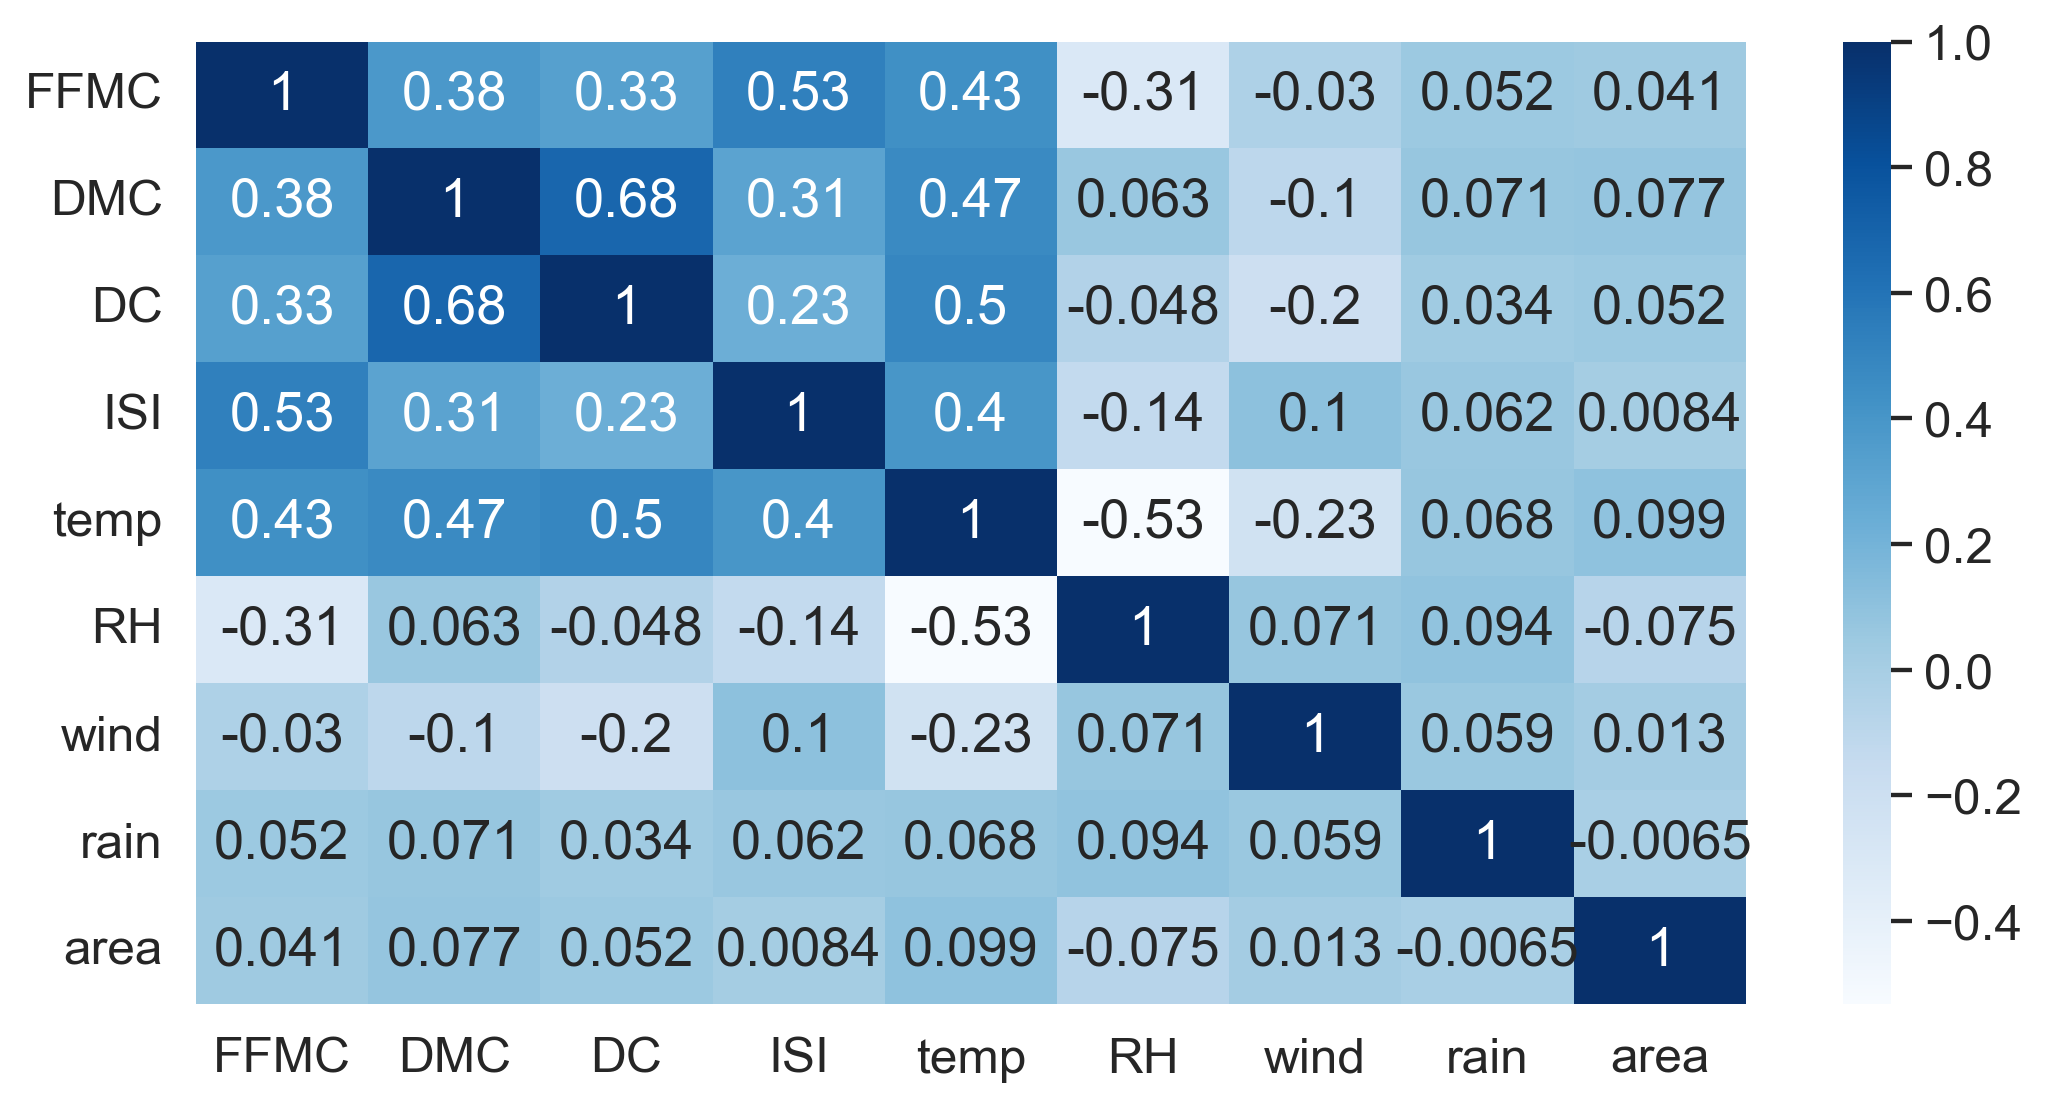

In [29]:
sns.heatmap(df.corr(), annot = True, cmap = 'Blues')

In [30]:
# Encoding month and day features

In [31]:
df.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),
                           (1,2,3,4,5,6,7,8,9,10,11,12), inplace = True)
df.day.replace(('mon','tue','wed','thu','fri','sat','sun'), (1,2,3,4,5,6,7), inplace = True)
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,small
1,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,small
2,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,small
3,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,small
4,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,small


In [32]:
# Encoding target variable 'size category'

In [33]:
df.size_category.replace(('small', 'large'), (0, 1), inplace = True)
df.sample(5)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
348,9,5,92.1,99.0,745.3,9.6,17.4,57,4.5,0.0,0.00,0
400,6,3,93.3,49.5,297.7,14.0,28.0,34,4.5,0.0,8.16,1
410,2,5,84.1,7.3,52.8,2.7,14.7,42,2.7,0.0,0.00,0
248,8,3,93.1,157.3,666.7,13.5,28.7,28,2.7,0.0,0.00,0
377,8,6,93.7,231.1,715.1,8.4,21.9,42,2.2,0.0,174.63,1


In [34]:
df.corr()['size_category'].sort_values(ascending = False)

size_category    1.000000
area             0.310561
month            0.088291
wind             0.059513
rain             0.053463
DMC              0.046598
DC               0.028372
FFMC             0.024292
day              0.015526
temp             0.009976
ISI             -0.007867
RH              -0.039730
Name: size_category, dtype: float64

In [35]:
# Standardizing data

In [36]:
sc = StandardScaler()

sc.fit(df.drop('size_category', axis = 1))

StandardScaler()

In [37]:
scaled_features = sc.transform(df.drop('size_category', axis = 1))
data_head = pd.DataFrame(scaled_features, columns = df.columns[:-1])
data_head

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,-1.964353,0.360387,-0.796040,-1.318386,-1.828931,-0.856568,-1.827729,0.412656,1.494370,-0.069035,-0.202791
1,1.104033,-1.083997,-0.003257,-1.174053,0.489257,-0.507267,-0.148307,-0.688321,-1.729364,-0.069035,-0.202791
2,1.104033,0.841848,-0.003257,-1.043839,0.561045,-0.507267,-0.730964,-0.688321,-1.507037,-0.069035,-0.202791
3,-1.964353,0.360387,0.194939,-1.206998,-1.896686,-0.005147,-1.810592,3.226265,-0.006333,0.606709,-0.202791
4,-1.964353,1.323309,-0.237488,-0.924607,-1.797070,0.125841,-1.279346,3.348596,-1.229129,-0.069035,-0.202791
...,...,...,...,...,...,...,...,...,...,...,...
504,0.227352,1.323309,-1.624859,-0.839890,0.475141,-1.555170,1.531115,-0.749487,-0.728894,-0.069035,-0.102277
505,0.227352,1.323309,-1.624859,-0.839890,0.475141,-1.555170,0.520034,1.635965,0.994136,-0.069035,0.644559
506,0.227352,1.323309,-1.624859,-0.839890,0.475141,-1.555170,0.400076,1.574799,1.494370,-0.069035,-0.028608
507,0.227352,0.841848,0.681420,0.561083,0.269860,0.496973,1.154102,-0.137832,-0.006333,-0.069035,-0.202791


In [38]:
# Splitting data into test data and train data

In [39]:
xtrain, xtest, ytrain, ytest = train_test_split(data_head, df['size_category'], test_size = 0.3, random_state = 42)

In [40]:
print('Shape of xtrain: ', xtrain.shape)
print('Shape of xtest: ', xtest.shape)
print('Shape of ytrain: ', ytrain.shape)
print('Shape of ytest: ', ytest.shape)

Shape of xtrain:  (356, 11)
Shape of xtest:  (153, 11)
Shape of ytrain:  (356,)
Shape of ytest:  (153,)


In [41]:
# Model building

In [44]:
svc = SVC()
svc.fit(xtrain, ytrain)
prediction = svc.predict(xtest)

print(classification_report(ytest, prediction))
print(confusion_matrix(ytest, prediction))

              precision    recall  f1-score   support

           0       0.78      0.99      0.87       109
           1       0.93      0.30      0.45        44

    accuracy                           0.79       153
   macro avg       0.85      0.64      0.66       153
weighted avg       0.82      0.79      0.75       153

[[108   1]
 [ 31  13]]


In [47]:
print('Accuracy: ' , accuracy_score(ytest, prediction))
print('Precision: ', precision_score(ytest, prediction))
print('Recall: ', recall_score(ytest, prediction))

Accuracy:  0.7908496732026143
Precision:  0.9285714285714286
Recall:  0.29545454545454547


In [48]:
# Building SVM model with Hyper Parameter

In [49]:
model = SVC(kernel = 'rbf', gamma = 15, C = 1)

In [50]:
model.fit(xtrain, ytrain)
prediction = model.predict(xtest)

print(classification_report(ytest, prediction))
print(confusion_matrix(ytest, prediction))

              precision    recall  f1-score   support

           0       0.73      0.97      0.83       109
           1       0.57      0.09      0.16        44

    accuracy                           0.72       153
   macro avg       0.65      0.53      0.49       153
weighted avg       0.68      0.72      0.64       153

[[106   3]
 [ 40   4]]


In [51]:
print('Accuracy: ', accuracy_score(ytest, prediction))
print('Precision: ',precision_score(ytest, prediction))
print('Recall: ', recall_score(ytest, prediction))

Accuracy:  0.7189542483660131
Precision:  0.5714285714285714
Recall:  0.09090909090909091


In [52]:
# Building model with Grid Search CV

In [55]:
clf = SVC()
param_grid = [{'kernel':['linear', 'poly', 'rbf', 'sigmoid'],'gamma':[50,5,10,0.5],'C':[15,14,13,12,11,10,0.1,0.001]}]
gsv = GridSearchCV(clf,param_grid,cv = 10)
gsv.fit(xtrain, ytrain)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [15, 14, 13, 12, 11, 10, 0.1, 0.001],
                          'gamma': [50, 5, 10, 0.5],
                          'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}])

In [56]:
gsv.best_params_ , gsv.best_score_ 

({'C': 15, 'gamma': 50, 'kernel': 'linear'}, 0.9775396825396825)

In [57]:
# Building final SVM model with 'C': 15, 'gamma': 50, 'kernel': 'linear'

In [58]:
final_model = SVC(C = 15, gamma = 50, kernel = 'linear')

In [59]:
final_model.fit(xtrain, ytrain)
prediction = final_model.predict(xtest)

print(classification_report(ytest, prediction))
print(confusion_matrix(ytest, prediction))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       109
           1       0.97      0.82      0.89        44

    accuracy                           0.94       153
   macro avg       0.95      0.90      0.92       153
weighted avg       0.94      0.94      0.94       153

[[108   1]
 [  8  36]]


In [60]:
print('Accuracy: ', accuracy_score(ytest, prediction))
print('Precision: ', precision_score(ytest, prediction))
print('Recall: ', recall_score(ytest, prediction))

Accuracy:  0.9411764705882353
Precision:  0.972972972972973
Recall:  0.8181818181818182
